##One of the most common problems in business. Determining the mood of the client.

If a business owner can predict in advance that a customer will not return, will not use the product or service again, he can act to retain the customer and change his mind.

In this practice, we predict whether a customer will stay or not by analyzing the data of online store customers.

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder,StandardScaler,OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split,cross_val_predict, GridSearchCV
from sklearn.metrics import jaccard_score,classification_report,confusion_matrix,RocCurveDisplay,accuracy_score
from sklearn.linear_model import  LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics 

In [133]:
url="https://github.com/Farrukh-Maruf/praktikum_datasets/blob/main/E-Commerce-Dataset.xlsx?raw=true"

df = pd.read_excel(url, sheet_name="E Comm")

df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [135]:
churn_st = df['Churn'].value_counts()
churn_st

0    4682
1     948
Name: Churn, dtype: int64

As we can see 4682 customers bought and stayed loyal,
but 948 ones did not.

Lets see this in graph


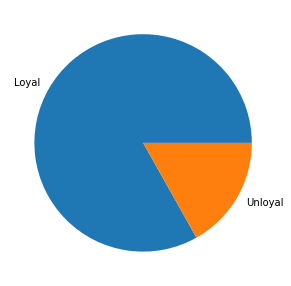

In [136]:
plt.figure(figsize=(5,5))
plt.pie(churn_st, labels=['Loyal','Unloyal'])
plt.show()

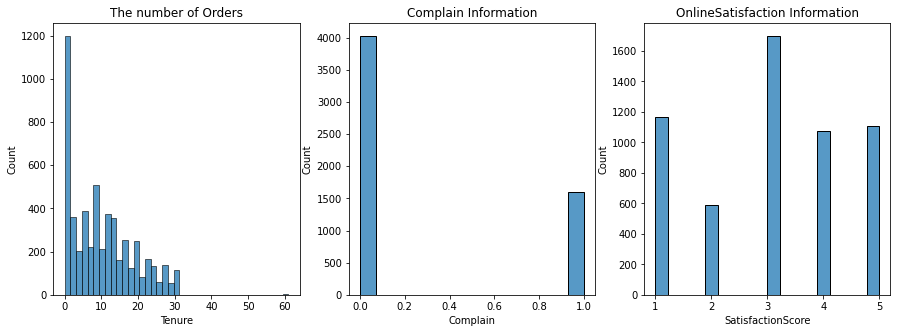

In [137]:
fig,axes=plt.subplots(1,3,figsize=(15,5))

sns.histplot(x="Tenure",data=df,ax=axes[0])
axes[0].set_title("The number of Orders")

sns.histplot(x='Complain',data=df,ax=axes[1])
axes[1].set_title('Complain Information')

sns.histplot(x='SatisfactionScore',data=df,ax=axes[2])
axes[2].set_title('OnlineSatisfaction Information')

plt.show()

In [138]:
df.corrwith(df['Churn']).abs().sort_values(ascending=False)

Churn                          1.000000
Tenure                         0.349408
Complain                       0.250188
DaySinceLastOrder              0.160757
CashbackAmount                 0.154118
NumberOfDeviceRegistered       0.107939
SatisfactionScore              0.105481
CityTier                       0.084703
WarehouseToHome                0.076630
NumberOfAddress                0.043931
OrderCount                     0.028697
CustomerID                     0.019083
HourSpendOnApp                 0.018675
OrderAmountHikeFromlastYear    0.010058
CouponUsed                     0.008264
dtype: float64

Lets choose the columns which influence the Churn column higher

In [139]:
df1 = df[['Churn', 'Tenure', 'DaySinceLastOrder', 'CashbackAmount', 'NumberOfDeviceRegistered', 'SatisfactionScore','CityTier','WarehouseToHome']]

In [140]:
df1.isnull().sum()

Churn                         0
Tenure                      264
DaySinceLastOrder           307
CashbackAmount                0
NumberOfDeviceRegistered      0
SatisfactionScore             0
CityTier                      0
WarehouseToHome             251
dtype: int64

In [141]:
df1 = df1.dropna()

In [142]:
df1.shape


(4808, 8)

In [143]:
label=LabelEncoder()
df1=df1.apply(LabelEncoder().fit_transform)

In [144]:
X = df1.drop('Churn', axis=1)
y = df1['Churn'].copy()

In [145]:
scr = StandardScaler()
X = scr.fit_transform(X)

In [146]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

Decision Tree

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       816
           1       0.82      0.84      0.83       146

    accuracy                           0.95       962
   macro avg       0.89      0.90      0.90       962
weighted avg       0.95      0.95      0.95       962

Model aniqligi: 0.946985446985447


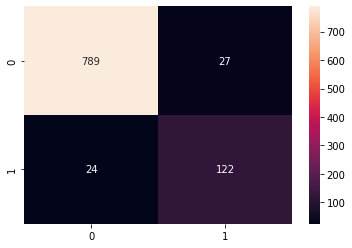

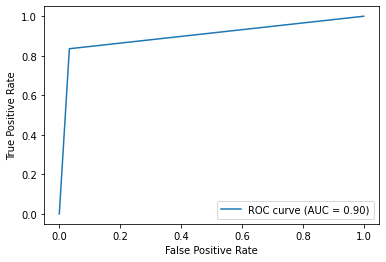

In [147]:
#Model (training)
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# Evaluate the model
y_pred = tree_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Model aniqligi:", accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

XGBoot

In [148]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)


XGBClassifier()

              precision    recall  f1-score   support

           0       0.91      0.96      0.94       816
           1       0.69      0.46      0.55       146

    accuracy                           0.89       962
   macro avg       0.80      0.71      0.74       962
weighted avg       0.88      0.89      0.88       962

Accuracy: 0.8866943866943867


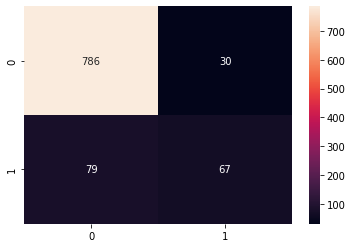

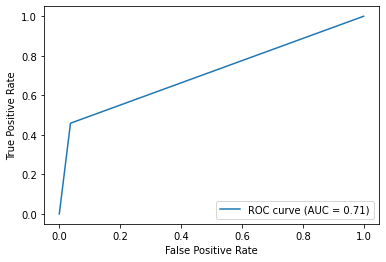

In [149]:
# Evaluate the model
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))

#confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()